<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Models/Preprocessing/Multi_collinerity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import random
from math import *
import operator

import pandas as pd
import numpy as np
np.set_printoptions(precision=4)

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.datasets import load_boston

from scipy.stats import shapiro

# import the ML algorithm
from sklearn.linear_model import LinearRegression

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### data set
- crim    - per capita crime rate by town.
- zn      - proportion of residential land zoned for lots over 25,000 sq.ft.
- indus   - proportion of non-retail business acres per town.
- chas    - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox     - nitrogen oxides concentration (parts per 10 million).
- rm      - average number of rooms per dwelling.
- age     - proportion of owner-occupied units built prior to 1940.
- dis     - weighted mean of distances to five Boston employment centres.
- rad     - index of accessibility to radial highways.
- tax     - full-value property-tax rate per (dollars) 10,000.
- ptratio - pupil-teacher ratio by town.
- black   - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- lstat   - lower status of the population (percent).

- __medv    - median value of owner-occupied homes in $1000s.__

In [2]:
# load data set
boston = load_boston()

print (boston.feature_names)
print (boston.data.shape)
print (boston.target.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [0]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)

In [5]:
X      = boston.data
X_orig = boston.data

y      = boston.target

print (X)

[[  0.01  18.     2.31   0.   ... 296.    15.3  396.9    4.98]
 [  0.03   0.     7.07   0.   ... 242.    17.8  396.9    9.14]
 [  0.03   0.     7.07   0.   ... 242.    17.8  392.83   4.03]
 [  0.03   0.     2.18   0.   ... 222.    18.7  394.63   2.94]
 ...
 [  0.05   0.    11.93   0.   ... 273.    21.   396.9    9.08]
 [  0.06   0.    11.93   0.   ... 273.    21.   396.9    5.64]
 [  0.11   0.    11.93   0.   ... 273.    21.   393.45   6.48]
 [  0.05   0.    11.93   0.   ... 273.    21.   396.9    7.88]]


In [0]:
df = pd.DataFrame(X_orig, columns=boston.feature_names)

In [0]:
def run_model(df_selected_cols, y):
    X_train, X_test, y_train, y_test = train_test_split(df_selected_cols, y, random_state=1, test_size=0.3)
    
    # instantiate
    linreg = LinearRegression()

    # fit the model to the training data (learn the coefficients)
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    # Model evaluation metrics for regression
    print('y-intercept             : ', linreg.intercept_)
    print('beta coefficients       : ', linreg.coef_)
    print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('r2 value                : ', metrics.r2_score(y_test, y_pred))
    print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    
    stat, p = shapiro(y_test - y_pred)
    
    print('\nStatistics=%.3f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        print('residuals look Gaussian (fail to reject H0)')
    else:
        print('residuals does not look Gaussian (reject H0)')

In [0]:
def model_coeff(df_selected_cols, y):
    X_train, X_test, y_train, y_test = train_test_split(df_selected_cols, y, random_state=1, test_size=0.3)
    
    # instantiate
    linreg = LinearRegression()

    # fit the model to the training data (learn the coefficients)
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    # Model evaluation metrics for regression
    for col, coeff in zip(df_selected_cols.columns, linreg.coef_):
        print('{:15s} : {:8.6f}'.format(col, coeff))

## Check multi collinearity using eigen things

In [0]:
from numpy.linalg import inv

import scipy 
import scipy.linalg as la

In [0]:
def multicoll_eigen(df_selected_cols, y):

    X = df_selected_cols.values
    
    # get the corr
    scipy.corrcoef(X, rowvar=False)

    # check the multi collinearity
    corr = scipy.corrcoef(X, rowvar=False)

    eigvals, eigvecs = la.eig(corr)
    eigvals = eigvals.real

    print(eigvals)
    print(eigvecs)

In [11]:
# check VIF for all columns
df_selected_cols = df

multicoll_eigen(df_selected_cols, y)

[6.13 1.43 1.24 0.86 0.83 0.66 0.54 0.4  0.06 0.28 0.17 0.19 0.22]
[[-0.25  0.32 -0.25 -0.06  0.08  0.22 -0.78 -0.15 -0.05 -0.26  0.09  0.11 -0.02]
 [ 0.26  0.32 -0.3  -0.13  0.32  0.32  0.27  0.4   0.08 -0.36 -0.07 -0.26 -0.27]
 [-0.35 -0.11  0.02 -0.02 -0.01  0.08  0.34 -0.17  0.25 -0.64 -0.11  0.3   0.36]
 [-0.01 -0.45 -0.29 -0.82  0.09 -0.17 -0.07  0.02 -0.04  0.01 -0.   -0.01  0.01]
 [-0.34 -0.22 -0.12  0.13  0.14  0.15  0.2  -0.08 -0.04  0.02  0.8  -0.11 -0.23]
 [ 0.19 -0.15 -0.59  0.28 -0.42 -0.06 -0.06  0.33 -0.05 -0.05  0.15 -0.05  0.43]
 [-0.31 -0.31  0.02  0.18  0.02  0.07 -0.12  0.6   0.04  0.07 -0.21  0.46 -0.36]
 [ 0.32  0.35  0.05 -0.22  0.1  -0.02  0.1   0.12  0.02  0.15  0.39  0.7   0.17]
 [-0.32  0.27 -0.29 -0.13 -0.2   0.14  0.14 -0.08  0.63  0.47 -0.11 -0.04 -0.02]
 [-0.34  0.24 -0.22 -0.1  -0.13  0.19  0.31 -0.08 -0.72  0.18 -0.22  0.1   0.04]
 [-0.2   0.31  0.32 -0.28 -0.58 -0.27 -0.    0.32 -0.02 -0.25  0.21 -0.17 -0.15]
 [ 0.2  -0.24  0.3  -0.17 -0.35  0.8  -0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  if __name__ == '__main__':


there seems to __no multi-collinearity__, as there no eigen value = 0

In [12]:
print('\nModel coeff ...')
run_model(df_selected_cols, y)


Model coeff ...
y-intercept             :  46.39649387182361
beta coefficients       :  [ -0.1    0.06   0.06   2.44 -21.47   2.8    0.    -1.52   0.31  -0.01  -1.01   0.01  -0.57]
Mean Abs Error   MAE    :  3.3446655035987436
Mean Sq  Error MSE      :  19.831323672063174
Root Mean Sq Error RMSE :  4.453237437198153
r2 value                :  0.7836295385076287
MAPE                    :  16.20753603228139

Statistics=0.945, p=0.000
residuals does not look Gaussian (reject H0)


## let us try adding collinear columns

In [0]:
df_orig = df

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# check VIF
df_selected_cols = df

model_coeff(df_selected_cols, y)

CRIM            : -0.098542
ZN              : 0.060784
INDUS           : 0.059172
CHAS            : 2.439560
NOX             : -21.469965
RM              : 2.795814
AGE             : 0.003575
DIS             : -1.516272
RAD             : 0.307542
TAX             : -0.011280
PTRATIO         : -1.005466
B               : 0.006450
LSTAT           : -0.568835


In [16]:
df['AGE_IN_DAYS'] = df['AGE'] * 365 +10

# check VIF
df_selected_cols = df

model_coeff(df_selected_cols, y)

CRIM            : -0.098542
ZN              : 0.060784
INDUS           : 0.059172
CHAS            : 2.439560
NOX             : -21.469965
RM              : 2.795814
AGE             : 0.000000
DIS             : -1.516272
RAD             : 0.307542
TAX             : -0.011280
PTRATIO         : -1.005466
B               : 0.006450
LSTAT           : -0.568835
AGE_IN_DAYS     : 0.000010


In [17]:
# check VIF for all columns
df_selected_cols = df

multicoll_eigen(df_selected_cols, y)

[6.77 1.59 1.24 0.83 0.89 0.66 0.56 0.5  0.06 0.28 0.24 0.17 0.2  0.  ]
[[-0.23 -0.33  0.24  0.09  0.   -0.26  0.55  0.56 -0.05 -0.25 -0.09 -0.11  0.09  0.  ]
 [ 0.25 -0.25  0.28  0.33  0.   -0.38  0.   -0.5   0.08 -0.37 -0.11  0.11 -0.35  0.  ]
 [-0.33  0.04 -0.01 -0.01  0.08 -0.02 -0.42 -0.01  0.25 -0.64  0.08  0.07  0.48  0.  ]
 [-0.01  0.36  0.31  0.13  0.85  0.12  0.15 -0.03 -0.04  0.01  0.01  0.01 -0.01 -0.  ]
 [-0.33  0.15  0.13  0.13 -0.06 -0.09 -0.32  0.05 -0.04  0.01 -0.05 -0.77 -0.34  0.  ]
 [ 0.17  0.18  0.6  -0.44 -0.26  0.05  0.13 -0.11 -0.04 -0.11  0.51 -0.12  0.08  0.  ]
 [-0.32  0.32 -0.01  0.01 -0.18 -0.11  0.3  -0.31  0.02  0.04 -0.21  0.04  0.13 -0.71]
 [ 0.31 -0.28 -0.06  0.11  0.11 -0.04  0.12 -0.29  0.02  0.17 -0.06 -0.52  0.62  0.  ]
 [-0.29 -0.31  0.28 -0.2   0.12 -0.15 -0.12 -0.06  0.63  0.48 -0.01  0.11 -0.02  0.  ]
 [-0.31 -0.29  0.22 -0.12  0.1  -0.18 -0.28 -0.15 -0.72  0.19 -0.05  0.19  0.15 -0.  ]
 [-0.19 -0.32 -0.33 -0.57  0.26  0.2   0.25 -0.29 -0.02 -0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  if __name__ == '__main__':


In [18]:
df['AGE_IN_DAYS'] = df['AGE'] * 365 / 10
df['RM_SQUARED']  = df['RM'] ** 2

# check VIF
df_selected_cols = df

model_coeff(df_selected_cols, y)

CRIM            : -0.124955
ZN              : 0.045138
INDUS           : 0.087996
CHAS            : 1.802381
NOX             : -20.797713
RM              : -28.059592
AGE             : -0.000000
DIS             : -1.235400
RAD             : 0.280806
TAX             : -0.011199
PTRATIO         : -0.847498
B               : 0.005826
LSTAT           : -0.556937
AGE_IN_DAYS     : -0.000015
RM_SQUARED      : 2.448717


In [19]:
# check VIF for all columns
df_selected_cols = df

multicoll_eigen(df_selected_cols, y)

[6.99 1.95 1.53 0.94 0.86 0.66 0.56 0.51 0.28 0.27 0.2  0.17 0.06 0.   0.  ]
[[-0.22 -0.01  0.39  0.11  0.08 -0.25  0.52 -0.6   0.16  0.2  -0.09  0.11 -0.05 -0.01  0.  ]
 [ 0.24  0.04  0.31  0.29  0.27 -0.37  0.04  0.5   0.24  0.31  0.35 -0.1   0.08 -0.01 -0.  ]
 [-0.32 -0.04 -0.03  0.05 -0.06 -0.02 -0.4   0.05  0.61  0.23 -0.47 -0.09  0.25  0.01 -0.  ]
 [-0.01 -0.23 -0.24  0.81 -0.43  0.13  0.17  0.03  0.   -0.02  0.01 -0.01 -0.04 -0.    0.  ]
 [-0.32 -0.17 -0.08  0.09  0.16 -0.09 -0.32 -0.03 -0.01  0.    0.33  0.78 -0.04 -0.    0.  ]
 [ 0.19 -0.57  0.17 -0.18 -0.07  0.03  0.06  0.06  0.17 -0.17 -0.04  0.06 -0.03 -0.71 -0.  ]
 [-0.31 -0.21 -0.26 -0.12  0.13 -0.1   0.3   0.28 -0.17  0.18 -0.13 -0.03  0.02 -0.   -0.71]
 [ 0.3   0.24  0.19  0.1  -0.01 -0.03  0.16  0.3  -0.13 -0.09 -0.63  0.52  0.02  0.02  0.  ]
 [-0.28 -0.08  0.42  0.07 -0.19 -0.16 -0.14  0.05 -0.43 -0.22  0.02 -0.11  0.63 -0.01 -0.  ]
 [-0.3  -0.04  0.36  0.07 -0.13 -0.19 -0.28  0.16 -0.19 -0.06 -0.15 -0.19 -0.72  0.   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  if __name__ == '__main__':


In [20]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,AGE_IN_DAYS,RM_SQUARED
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,0.352734,-0.203683
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.569537,0.307863
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.644779,-0.382654
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.086518,0.098034
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.731470,-0.283930
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.240265,0.994528
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,1.000000,-0.222991
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.747881,0.183715
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.456022,-0.196734
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.506456,-0.280877


In [0]:
import seaborn as sns

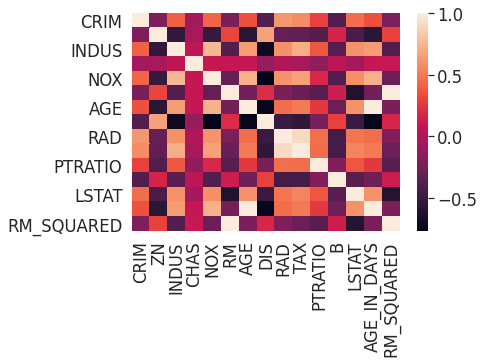

In [22]:
sns.heatmap(df.corr())